In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('adult_data.csv')
df_test = pd.read_csv('adult_test.csv')
df_merged = pd.concat([df_train, df_test], ignore_index=True) # later on I'll split it again

In [3]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1    workclass       48842 non-null  object
 2    fnlwgt          48842 non-null  int64 
 3    education       48842 non-null  object
 4    education-num   48842 non-null  int64 
 5    marital-status  48842 non-null  object
 6    occupation      48842 non-null  object
 7    relationship    48842 non-null  object
 8    race            48842 non-null  object
 9    sex             48842 non-null  object
 10   capital-gain    48842 non-null  int64 
 11   capital-loss    48842 non-null  int64 
 12   hours-per-week  48842 non-null  int64 
 13   native-country  48842 non-null  object
 14   salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Most of the columns have a space in the beginning of their name, lets remove it:

In [4]:
rename_dict = {col:col.strip() for col in df_merged.columns}
df_merged.rename(columns=rename_dict, inplace=True)

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df_merged.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_merged

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [8]:
# Checking the unique values in each column

for col in df_merged.columns:
    if df_merged.dtypes[col] == np.object:
        print(f"unique values for the {col} column:")
        print(*df_merged[col].unique(), sep=",", end="\n\n")

unique values for the workclass column:
 State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked

unique values for the education column:
 Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th, Preschool, 12th

unique values for the marital-status column:
 Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed

unique values for the occupation column:
 Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv

unique values for the relationship column:
 Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative

unique values for the race column:
 White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other

unique values for the sex column:
 M

We can see two things:
1. There is a "?" value in the "workclass" & "occupation" columns that we need to take care of
3. For some reason a "." has been added to some of the values in the "salary" column

In [9]:
# replacing the "?" with NaN

df_merged.replace(r'\?', np.NaN, regex=True, inplace=True)

In [10]:
# using regex to remove the "." from the "salary" column
 
df_merged['salary'].replace(r'(.*)\.', r'\1', regex = True, inplace = True)

In [11]:
# removing rows with missing values

df_merged.dropna(inplace=True)

# EDA

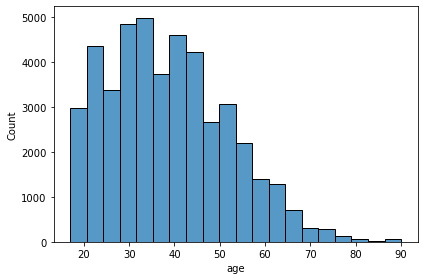

In [12]:
sns.histplot(data=df_merged, x='age', bins=20)
plt.tight_layout()

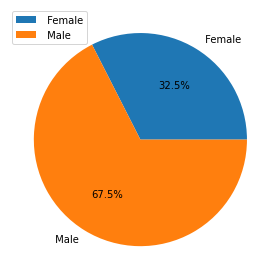

In [13]:
df_merged.groupby('sex').count().plot.pie(y='age', autopct='%1.1f%%')
plt.ylabel("")
plt.tight_layout()

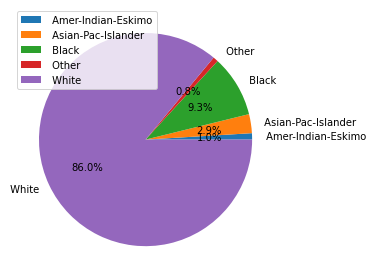

In [14]:
df_merged.groupby('race').count().plot.pie(y='age', autopct='%1.1f%%')
plt.ylabel("")
plt.legend(loc = 'upper left')
plt.tight_layout()

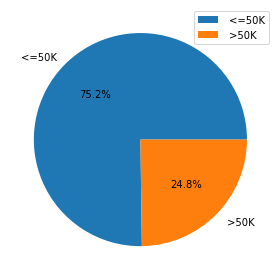

In [15]:
df_merged.groupby('salary').count().plot.pie(y='age', autopct='%1.1f%%')
plt.ylabel("")
plt.tight_layout()

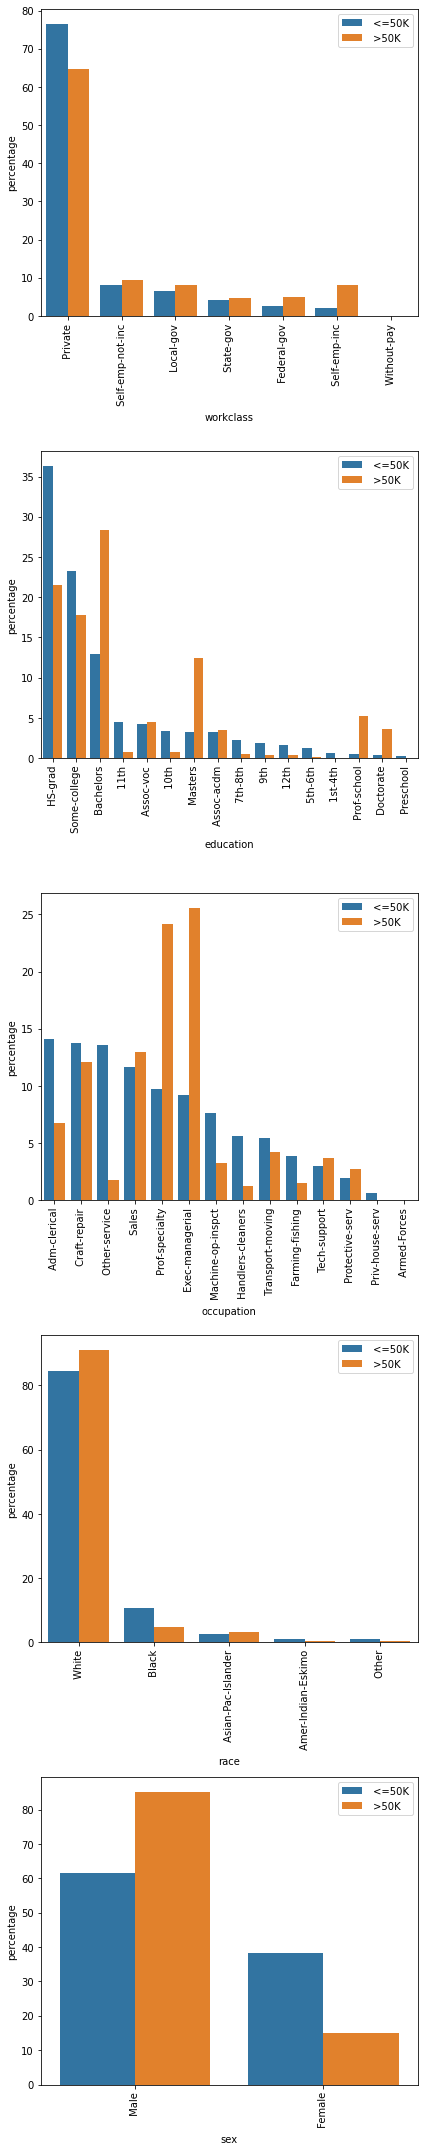

In [16]:
columns_to_graph = ['workclass', 'education', 'occupation', 'race', 'sex']

fig, axes = plt.subplots(nrows=len(columns_to_graph), ncols=1, figsize=(6,30))

for i, col in enumerate(columns_to_graph):
    col_salary = (df_merged.groupby('salary')[col]
                 .value_counts(normalize=True)
                 .rename('percentage')
                 .mul(100)
                 .reset_index())
    sns.barplot(ax=axes[i], x=col, y="percentage", hue="salary", data=col_salary)
    plt.setp(axes[i].get_xticklabels(), rotation=90)
    axes[i].legend(loc = 'upper right')
    
plt.tight_layout()

# Machine Learning

### Preparing the data

We will perform several actions on the following columns:

age - put the values inside bins  
workclass - create a new binary indicator column for each value (dummies)  
fnlwgt - drop the column  
education - drop the column (we will use education-num instead)  
martial-status - create a new binary indicator column for each value (dummies)  
occupation - create a new binary indicator column for each value (dummies)  
relationship - create a new binary indicator column for each value (dummies)  
race - create a new binary indicator column for each value (dummies)  
sex - 'Male' will be changed to 0, 'Female' will be changed to 1  
native-country - create a new binary indicator column for each value (dummies)  
salary - '<=50K' will be changed to 0, '>50K' will be changed to 1  


In [17]:
def data_prep(df :pd.DataFrame, cols_to_drop :list, cols_to_bins :dict, cols_to_dummies :list, replace_map :dict):
    new_df = df.copy()
    
    for col in cols_to_drop:
        new_df.drop(col, axis=1, inplace=True)
    
    for col, bins in cols_to_bins.items():
        new_df.drop(col, axis=1, inplace=True)
        new_col_name = col + '_categorial'
        new_df[new_col_name] = pd.cut(df[col], bins, labels=range(len(bins) - 1))
    
    new_df = pd.get_dummies(new_df, columns=cols_to_dummies, prefix=cols_to_dummies)
    
    new_df.replace(replace_map, inplace=True)
    
    return new_df

In [18]:
cols_to_drop = ['fnlwgt', 'education']
cols_to_bins = {'age':[0,10,20,30,40,50,60,70,80,90,100]}
cols_to_dummies = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
salary_replace_map = {' <=50K':0, ' >50K':1, ' Male':0, ' Female':1}

ML_df = data_prep(df_merged, cols_to_drop, cols_to_bins, cols_to_dummies, salary_replace_map)

In [19]:
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   education-num                               45222 non-null  int64   
 1   sex                                         45222 non-null  int64   
 2   capital-gain                                45222 non-null  int64   
 3   capital-loss                                45222 non-null  int64   
 4   hours-per-week                              45222 non-null  int64   
 5   salary                                      45222 non-null  int64   
 6   age_categorial                              45222 non-null  category
 7   workclass_ Federal-gov                      45222 non-null  uint8   
 8   workclass_ Local-gov                        45222 non-null  uint8   
 9   workclass_ Private                          45222 non-null  uint8   
 10

In [20]:
ML_df

,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,age_categorial,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,13,0,2174,0,40,0,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,13,0,0,0,13,0,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9,0,0,0,40,0,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,7,0,0,0,40,0,5,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,13,1,0,0,40,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,13,0,0,0,40,0,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48837,13,1,0,0,36,0,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,13,0,0,0,50,0,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,13,0,5455,0,40,0,4,0,0,1,...,0,0,0,0,0,0,0,1,0,0


###  Decision Tree classifaction model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

In [22]:
def load_dataset(df :pd.DataFrame, label_column :str):
    TRAINING_FEATURES = df.columns[df.columns != label_column]
    TARGET_FEATURE = label_column

    X = df[TRAINING_FEATURES]
    y = df[TARGET_FEATURE]
    return X, y

In [23]:
X, y = load_dataset(ML_df, 'salary')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [25]:
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':range(2,11), 'min_samples_split':range(5,21)}
    dt = DecisionTreeClassifier()
    clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score))
    clf.fit(X_train, y_train)
    
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_['min_samples_split']
    
    return clf, best_max_depth, best_min_samples_split

In [26]:
DT_classification_model, best_max_depth, best_min_samples_split = find_best_decision_tree_params(X_train, y_train)
y_pred = DT_classification_model.predict(X_test)

In [27]:
print("best max depth is:",best_max_depth)
print("best min samples split is:",best_min_samples_split,end='\n\n')
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

best max depth is: 8
best min samples split is: 8

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6744
           1       0.77      0.60      0.68      2301

    accuracy                           0.85      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045

[[6328  416]
 [ 916 1385]]
